# About the project

This project is to practice exploratory data visualization to explore data and find patterns, using dataset about **Heavy Traffic Indicators on I-94**. This dataset is collected and published by John Hogue, you can download it from the [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). 

Attribute Information:
This dataset includes *48,204 instances* with *9 attributes*:

> - holiday (Categorical): US National holidays & regional holiday
> - temp (Numeric): Average temp in kelvin
> - rain_1h (Numeric): Amount in mm of rain that occurred in the hour
> - snow_1h (Numeric): Amount in mm of snow that occured in the hour
> - clouds_all (Numeric): Percentage of cloud cover
> - weather_main (Categorical): Short textual description of the current weather
> - weather_description (Categorical): Longer textual description of the current weather
> - date_time (DateTime): Hour of the data collected in local CST time
> - traffic_volume (Numeric): Hourly I-94 ATR 301 reported westbound traffic volume

This goal of our analysis is to determine a few indicators of heavy traffic on I-94, either weather type, or time of the day, or time of the week, etc. The traffic volume reported only westbound area, so the results will be **about the westbound traffic in the proximity of a station located approximately  midway between Minneapolis and Saint Paul, not for the entire I-94 highway**.

We focus only on exploratory data visualization and practice the following:

> 1) How to visualize time series data with line plots

> 2) How to visualize correlations with scatter plots

> 3) How to visualize frequency distributions with bar plots and histograms

> 4) How to compare graphs using grid charts

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
traffic_data = pd.read_csv(r"Desktop\New folder\project4\Metro_Interstate_Traffic_Volume.csv")
print(traffic_data.head(3))
print(traffic_data.tail(3))
traffic_data.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         o

The dataset consists of 3 data types: float64, int 64 and object, and there isn't any nan value in the 9 columns. Now, let's see how traffic volume is distributed using a histogram plot.

# Exploratory Visualization

Text(0.5, 1.0, 'Traffic volume distribution')

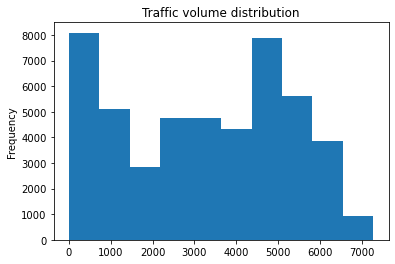

In [3]:
traffic_data['traffic_volume'].plot.hist()
plt.title("Traffic volume distribution")

In [4]:
traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the histogram and description, we notice that the dataset was divided into 10 bins (by default), with an interval of 728. 75% of dataset has a volume below 4,933, 2 highest frequencies are around the volume of 400 and 4700 . The maximum volume is 7,280. From volume of 0 to 2000, the histogram is right skewed, but from 2000 to max, it is normally distributed. 

Let's check whether daytime and nighttime influence the traffic volume. To do that, we will use 'date_time' column. We noticed before that date_time is defined as object in the dataset, we need to convert it to datetime type, and then separate into daytime and nighttime

In [5]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])
print(traffic_data['date_time'].head())

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]


The date_time column uses 24 hour clock, the daytime will be between 7:00 to 19:00, and the night time will be after 19:00 

In [6]:
day_time = traffic_data.copy()[(traffic_data['date_time'].dt.hour >= 7) & (traffic_data['date_time'].dt.hour < 19)]
night_time = traffic_data.copy()[(traffic_data['date_time'].dt.hour >= 19)|(traffic_data['date_time'].dt.hour < 7)]
print(day_time.shape)
print(night_time.shape)

(23877, 9)
(24327, 9)


Text(0.5, 1.0, 'nighttime')

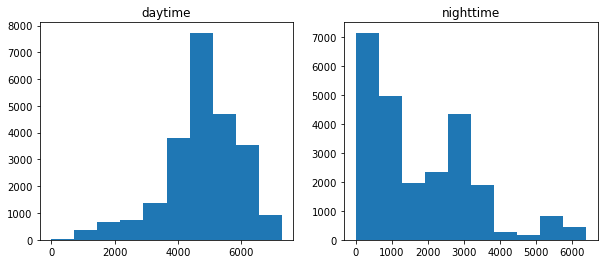

In [7]:
# To compare between day time and night time volume, we will plot 2 plots together, using subplot
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.hist(day_time['traffic_volume'])
plt.title("daytime")
plt.subplot(1,2,2)
plt.hist(night_time['traffic_volume'])
plt.title("nighttime")

We can see clearly that, the volume of traffic is much higher during the daytime, the histogram is a bit left skewed and most of volume was abouve 4000. Meanwhile, during night time, the histogram is right skewed and top frequencies belongs to volume below 1456.

Because our analysis's goal is to find heavy traffic indicators, we will focus more on daytime data. We first see that time has a specific impact on traffic volume. There might be also more people on the road in a certain month, on a certain day or at a certain time of the day.

In [8]:
# Create a new column to extract month from date_time
day_time['month'] = day_time['date_time'].dt.month
day_time.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10


In [9]:
# we group the dataset by the month column with the mean as an aggregate function
month_traffic_mean = round(day_time.groupby('month').mean())
month_traffic_mean['traffic_volume'].head()

month
1    4496.0
2    4711.0
3    4889.0
4    4907.0
5    4911.0
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic volume')

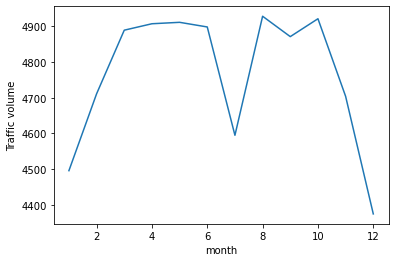

In [10]:
# Plot a line plot to see how traffic volume evoluates by month
plt.plot(month_traffic_mean['traffic_volume'])
plt.xlabel("month")
plt.ylabel("Traffic volume")

We notice that monthly traffic dropped sharply in July. Reason behind it should be investigated more.

In [11]:
# We will continue with another time unit: day of the week
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
dayofweek_traffic = day_time.groupby('dayofweek').mean()


Text(0.5, 1.0, 'Traffic by day of week')

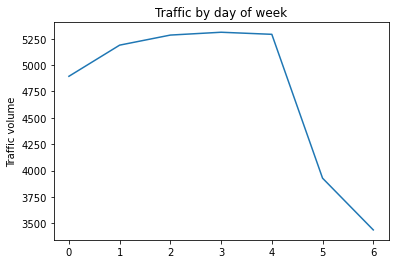

In [12]:
plt.plot(dayofweek_traffic['traffic_volume'])
plt.ylabel("Traffic volume")
plt.title("Traffic by day of week")
# 0 is monday and 6 is sunday

It can be seen from the line plot that traffic volume reduced remakably during the weekend. The reason may be people dont go to work these days.

Therefore, we now focus on business days when the traffic is heavier, and try to find whether there is more traffic at a certain hour of day.

In [13]:
day_time['hour'] = day_time['date_time'].dt.hour
business_days = day_time.copy()[day_time['dayofweek'] <= 4] # 4 is Friday
weekend = day_time.copy()[day_time['dayofweek'] >=5]

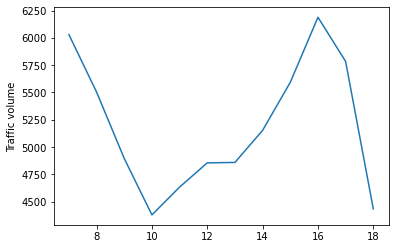

In [14]:
def hour_traffic(dataset):
    hour_traffic = dataset.groupby('hour').mean()
    plt.plot(hour_traffic['traffic_volume'])
    plt.ylabel("Traffic volume")

hour_traffic(business_days)

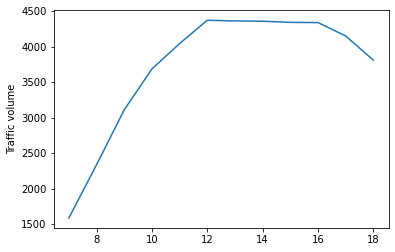

In [15]:
hour_traffic(weekend)

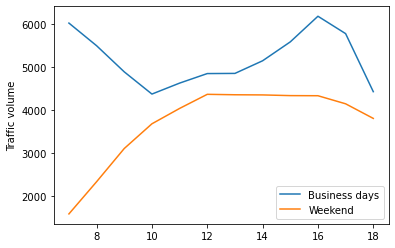

In [16]:
# We can also plot these 2 graphs together on one plot, or separately using subplot to make it easier for comparison
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()
plt.plot(by_hour_business['traffic_volume'], label = "Business days")
plt.plot(by_hour_weekend['traffic_volume'], label = 'Weekend')
plt.ylabel('Traffic volume')
plt.legend()

The rush hours on business days are before 8 and around 16 to 17 o'clock, time for commuting to and from work. On weekend, traffic increases gradually from 10am, then flat from 12am to 16 before slightly decreaing until 18 o'clock.

Other indicators about weather such as temp, rain_1h, snow_1h, etc. might also impact the volume of traffic. We will find the correlation between traffic and these indicators using corr().


In [17]:
day_time.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather column that has the strongest correlation with traffic volume is **temp**. 

(230.0, 350.0)

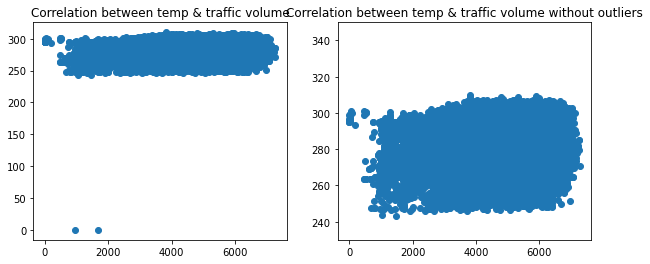

In [18]:
# draw a scatter plot to see correlation between temp and traffic volume
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.scatter(day_time['traffic_volume'], day_time['temp'])
plt.title("Correlation between temp & traffic volume")
# plt.ylim(230, 350)
plt.subplot(1,2,2)
plt.scatter(day_time['traffic_volume'], day_time['temp'])
plt.title("Correlation between temp & traffic volume without outliers")
plt.ylim(230, 350)

From the corr() result and scatter plot, we can say that even the weather indicator with the highest correlation does not seem a reliable indicator for heavy traffic. We will plot a bar chart to see how other indicators relate to traffic. 

In [19]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby("weather_description").mean()

<AxesSubplot:ylabel='weather_main'>

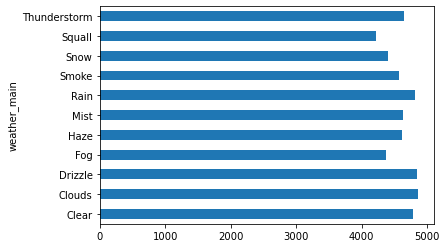

In [20]:
by_weather_main['traffic_volume'].plot.barh()

<AxesSubplot:ylabel='weather_description'>

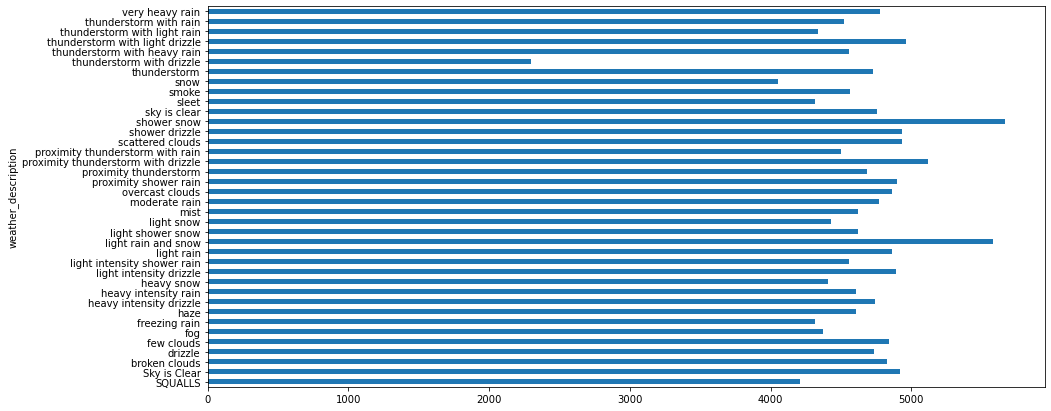

In [21]:
by_weather_description['traffic_volume'].plot.barh(figsize = (15, 7))

There is not any traffic volume exceeding 5,000 cars in traffic by weather main plot, meanwhile, in traffic by weather description, only 3 indicators have a traffic volume > 5,000 cars: Light rain and snow, proximity thunderstorm with drizzle, shower snow.

In [22]:
over_5K = by_weather_description[by_weather_description['traffic_volume'] > 5000]
print(over_5K.index)
                                

Index(['light rain and snow', 'proximity thunderstorm with drizzle',
       'shower snow'],
      dtype='object', name='weather_description')


# Conclusion

Throughout the analysis, we find out that time has influence on traffic volume. People move more during daytime, and especially on business days. The rush hours are around 7 o'clock in the morning, and around 16, 17 in the afternoon when people commute to and from work. Traffic drops sharply in July compared to other months, which should be investigated more. Other weather indicators do not show clear correlation with traffic volume. The highest correlation is between temperature and traffic, showing a very slight positive relationship between 2 variables. 